In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df3 =  pd.read_excel('survey_result_emailmasked.xlsx', sheet_name = 'Sheet1')

# How many people are willing to share their answers from this survey ###

Text(0,0.5,'Votes')

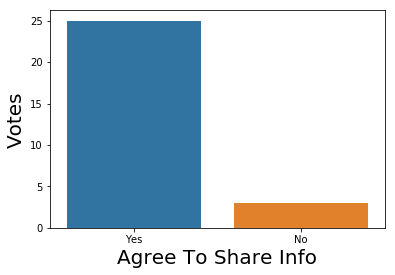

In [4]:
sns.countplot(data = df3, x = 'AgreeToShareInfo')
plt.xlabel('Agree To Share Info',fontsize = 20)
plt.ylabel('Votes', fontsize = 20)

In [425]:
def plotanswer(question):
    p = sns.countplot(data = df3, x = question)
    print(p)

# Should we plan a Physical Activity?

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0,0.5,'Votes')

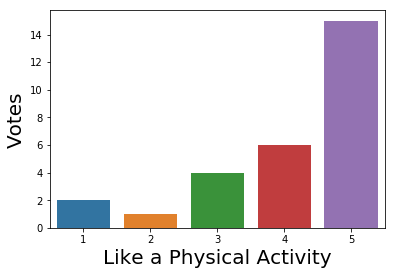

In [452]:
g = plotanswer('q12')
plt.xlabel('Like a Physical Activity', fontsize = 20)
plt.ylabel('Votes', fontsize = 20)

#groupedvalues=df3.counts('q12')
#groupedvalues

# Should we plan an event where we compete with each other or compete with other company?

In [427]:
dfp = df3[['q13', 'q14']]

C:\Users\hong.zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


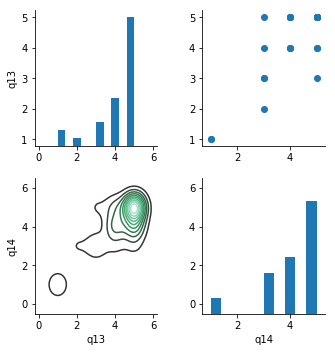

In [428]:
g = sns.PairGrid(dfp)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

# Should we plan an event with small group of same level, or across different level?

C:\Users\hong.zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


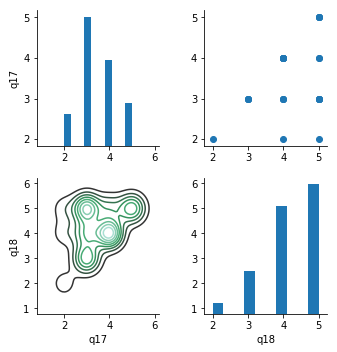

In [429]:
dfp = df3[['q17', 'q18']]
dfp = dfp.dropna()
p = sns.PairGrid(dfp)
p.map_diag(plt.hist)
p.map_upper(plt.scatter)
p.map_lower(sns.kdeplot)

# Should we plan an kids-friendly event?
Here we need some imputation: 
1. if q20 is 4 or 5, q21 is NaN, we assign 5 to q21
2. if q20 is NaN, and q21 is NaN, we assign 1 to q21
3. if q21 is NaN and q20 is neither NaN nor 4 nor 5, we assigne 3 to q21. 

In [433]:
dfp = df3[['q20', 'q21']]
dfp['q21'].loc[((dfp['q21'].isnull()) & ( (dfp['q20'] == 4) | (dfp['q20'] == 5)))] = 5
dfp['q21'].loc[((dfp['q21'].isnull()) & ( (dfp['q20'].isnull())))] = 1
dfp['q21'].loc[((dfp['q21'].isnull()) & ( ((dfp['q20'] == 3)|(dfp['q20'] == 2)|(dfp['q20'] == 1))))] = dfp['q20']

C:\Users\hong.zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hong.zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hong.zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

### how many of us are parent?

In [434]:
dfp['parent'] = np.where(dfp.q20.isnull(), 'no', 'yes')

C:\Users\hong.zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5,0,'Is A Parent?')

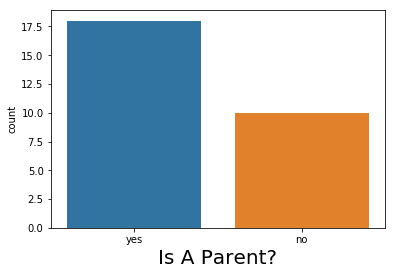

In [435]:
sns.countplot(data = dfp, x = 'parent')
plt.xlabel('Is A Parent?', fontsize = 20)

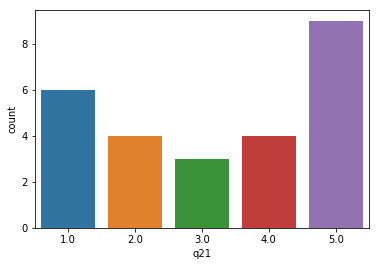

In [387]:
sns.countplot(data = dfp, x = 'q21')

dfpna = dfp.loc[dfp['q20'].isnull()]
dfpna.q21.plot.box()

In [391]:
dfpna1 = dfp
dfpna1['q20new'] = np.where((dfp.q20.isnull()|(dfp.q20 <= 3)), 'no', 'yes')

C:\Users\hong.zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,'prefer a kids-friendly event')

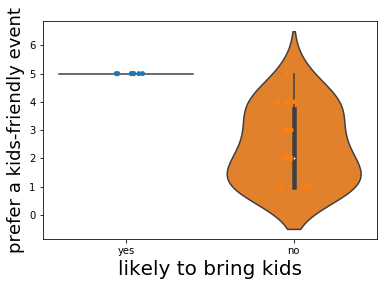

In [430]:
sns.stripplot(x="q20new", y="q21", data=dfpna1,jitter=True)
sns.violinplot(x = "q20new", y = 'q21', data = dfpna1)
plt.xlabel('likely to bring kids', fontsize = 20)
plt.ylabel('prefer a kids-friendly event', fontsize = 18)

# Should we plan an event including employee's significant others?

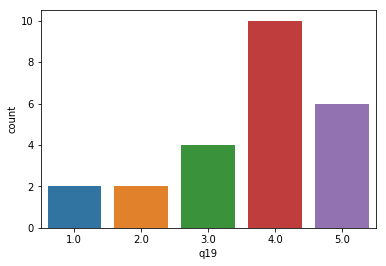

In [394]:
sns.countplot(data = df3, x = 'q19')

# What to consider when planning a team lunch?

C:\Users\hong.zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


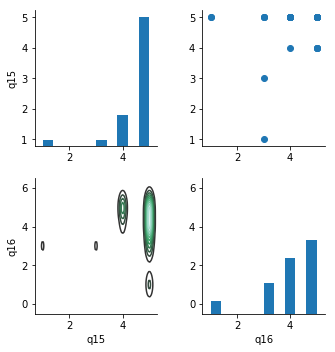

In [445]:
p = sns.PairGrid(df3[['q15', 'q16']])
p.map_diag(plt.hist)
p.map_upper(plt.scatter)
p.map_lower(sns.kdeplot)

Text(0,0.5,'Votes')

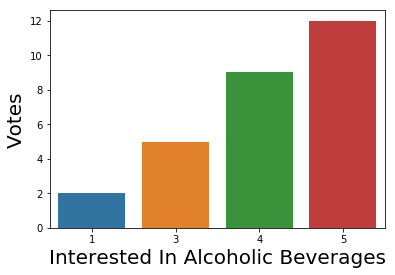

In [449]:
p = sns.countplot(df3['q16'])
plt.xlabel('Interested In Alcoholic Beverages', fontsize = 20)
plt.ylabel('Votes', fontsize = 20)

# When is the best time to plan a social event? Work day day time, vs after work, vs weekends.

C:\Users\hong.zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\hong.zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1533: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\hong.zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1534: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\hong.zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1176: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
C:\Users\hong.zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1176: RuntimeWarning: invalid value encountered in less
  inside = (self.levels >

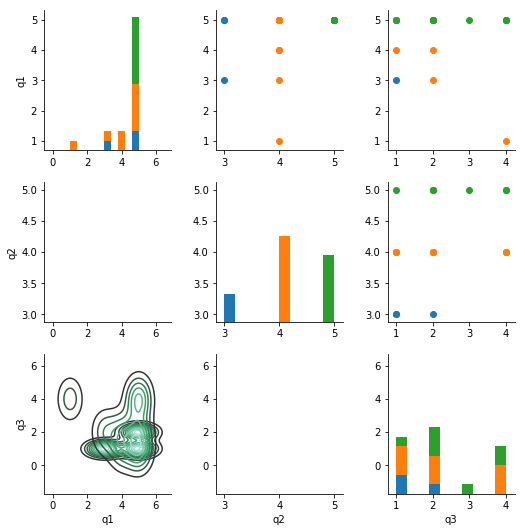

In [348]:
p = sns.PairGrid(df3[['q1', 'q2' ,'q3']], hue = 'q2')
p.map_diag(plt.hist)
p.map_upper(plt.scatter)
p.map_lower(sns.kdeplot)

# How late can should we plan to stay for an event?

In [436]:
dfp = df3[['q8', 'q9' ,'q10', 'q11']]
dfp1 = dfp.rename(columns = {
    'q8': '7pm',
    'q9': '8pm',
    'q10': '9pm',
    'q11': '10pm'
})

dfp1.plot.box()

dfp1.transpose().plot.line()

### look at only those who is likely to attend events afterwork

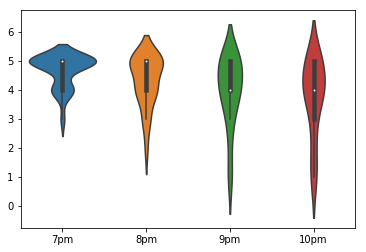

In [440]:
dfp = df3[['q2','q8', 'q9' ,'q10', 'q11', 'ID']]
dfp1 = dfp.rename(columns = {
    'q8': '7pm',
    'q9': '8pm',
    'q10': '9pm',
    'q11': '10pm'
})

dfp1['q2new'] = np.where(dfp1['q2'] >= 4, 'yes', 'no')
dfp2 = dfp1.loc[dfp1.q2new == 'yes']
#sns.stripplot(data = dfp2[['7pm', '8pm', '9pm', '10pm']], jitter = True)
sns.violinplot(data = dfp2[['7pm', '8pm', '9pm', '10pm']])

C:\Users\hong.zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


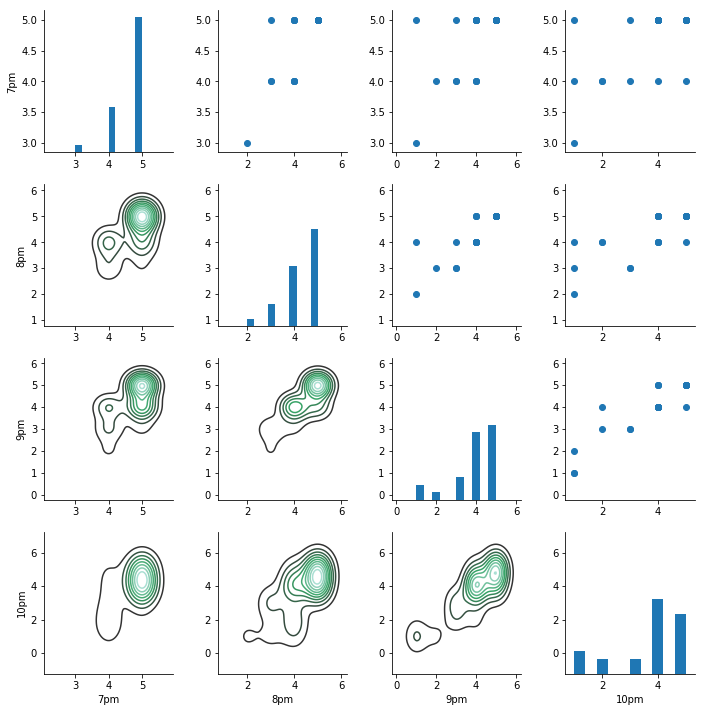

In [442]:
p = sns.PairGrid(data = dfp2[['7pm', '8pm', '9pm', '10pm']])
p.map_diag(plt.hist)
p.map_upper(plt.scatter)
p.map_lower(sns.kdeplot)

,q2,7pm,8pm,9pm,10pm,ID,q2new
1,3,4,2,1,1,2,no
13,3,3,2,2,2,14,no
14,3,2,2,1,1,15,no


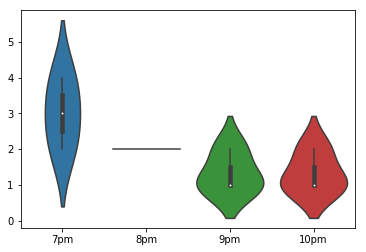

In [351]:
dfp2 = dfp1.loc[dfp1.q2new == 'no']
#sns.stripplot(data = dfp2[['7pm', '8pm', '9pm', '10pm']], jitter = True)
sns.violinplot(data = dfp2[['7pm', '8pm', '9pm', '10pm']])
dfp2

# How far away can we go?

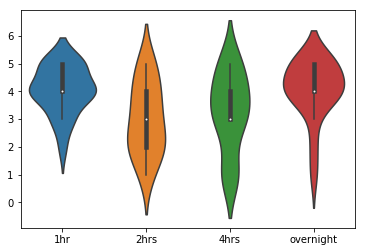

In [352]:
dfp = df3[['q4','q5', 'q6' ,'q7']]
dfp1 = dfp.rename(columns = {
    'q4': '1hr',
    'q5': '2hrs',
    'q6': '4hrs',
    'q7': 'overnight'
})
sns.violinplot(data = dfp1)

C:\Users\hong.zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


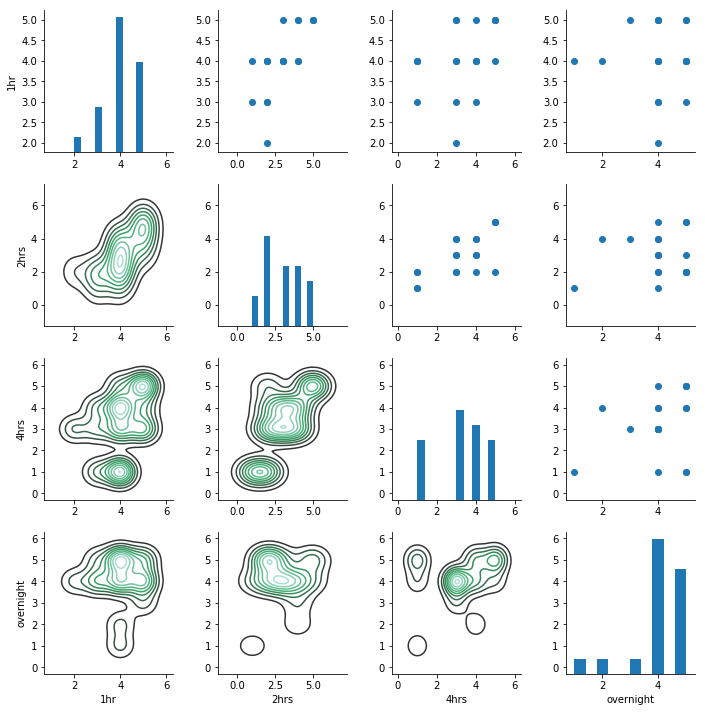

In [353]:
p = sns.PairGrid(dfp1)
p.map_diag(plt.hist)
p.map_upper(plt.scatter)
p.map_lower(sns.kdeplot)